In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = cv2.face.LBPHFaceRecognizer_create()

In [3]:
face_db = ['face_images/img1.jpg','face_images/img3.jpg','face_images/img44.jpg','face_images/img8.jpg']

In [4]:
detector = cv2.CascadeClassifier('model/haarcascade_frontalface_alt2.xml')

In [8]:
def detect_face(path):
    img = cv2.imread(path)
    faces_bbox = detector.detectMultiScale(img, 1.3, 5)
    x, y, w, h = faces_bbox[0]
    img = img[y:y + h, x:x + w]
    img = cv2.resize(img, dsize=(224,224))
    img = cv2.cvtColor(img, code=cv2.COLOR_BGR2GRAY)
    return img

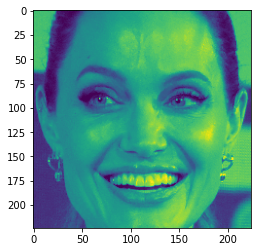

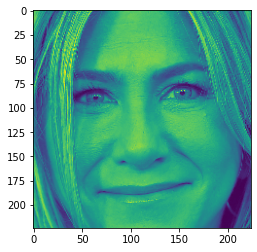

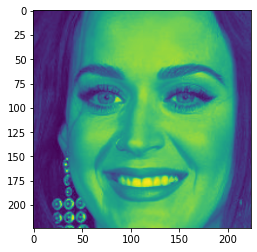

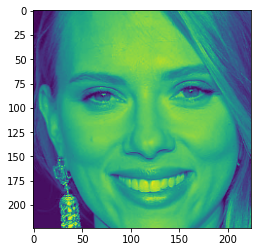

In [9]:
for p in face_db:
    detected_face = detect_face(p)
    plt.imshow(X = detected_face)
    plt.show()

In [10]:
faces = []
ids = []
index = 0

for p in face_db:
    detected_face = detect_face(p)
    faces.append(detected_face)
    ids.append(index)
    index += 1

In [12]:
ids = np.array(ids)

# training

In [13]:
model.train(faces, ids)

In [19]:
histogram = model.getHistograms()

# inference

In [30]:
def displayHistogram(target_file):
    img = detect_face(target_file)
    tmp_model = cv2.face.LBPHFaceRecognizer_create()
    tmp_model.train([img], np.array([0]))

    histogram = tmp_model.getHistograms()[0][0]
    #histogram = histogram[0:100]
    axis_values = np.array([i for i in range(0, len(histogram))])
    plt.figure(figsize=(10, 5))
    
    plt.bar(axis_values, histogram)
    plt.show()

In [14]:
target_path = 'face_images/img7.jpg'

In [15]:
target = detect_face(target_path)

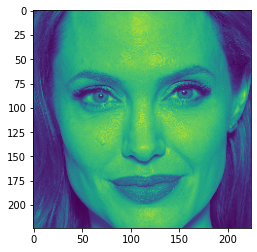

In [16]:
plt.imshow(target)

In [38]:
model.predict(target)

(1, 52.32936013678943)

In [33]:
idx, conf = model.predict(target)
print(idx, conf)

1 52.32936013678943


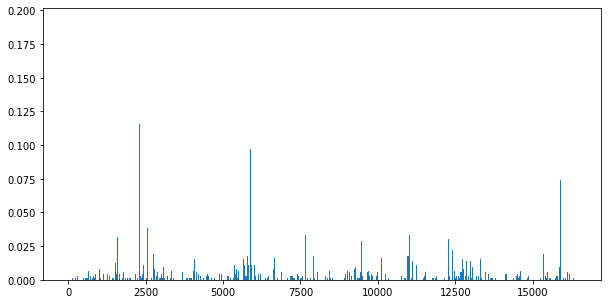

In [31]:
displayHistogram(target_file=target_path)

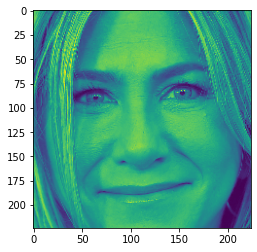

In [18]:
found_path = face_db[idx]
found = detect_face(found_path)
plt.imshow(found)

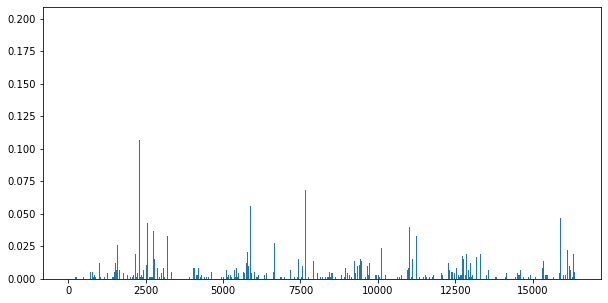

In [32]:
true_idx = 0

h = histogram[true_idx][0]
axis_values = np.array([i for i in range(0, len(h))])
plt.figure(figsize=(10, 5))
plt.bar(x = axis_values, height=h)
plt.show()

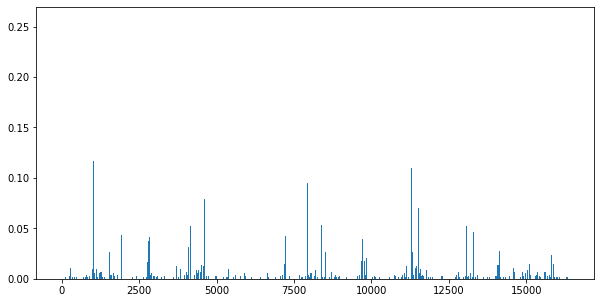

In [34]:
h = histogram[idx][0]
axis_values = np.array([i for i in range(0, len(h))])
plt.figure(figsize=(10, 5))
plt.bar(x = axis_values, height=h)
plt.show()